In [35]:
# Plot related imports

import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
import matplotlib.dates as matdates
from matplotlib.lines import Line2D
import matplotlib.markers as mmark
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns
import sys
import os
sns.set_style("ticks")
fontpath = expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 16,
    'axes.labelsize': 14,
    'font.size': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': prop.get_name(),
    'text.usetex': True
}

mpl.rcParams.update(params)

In [2]:
# Other imports
sys.path.insert(0, os.path.abspath('/data/savvas/incels/manosphere_analysis/helpers/'))
from helpers import jaccard, populate_bin_with_channel, add_user_to_bin, bins, bins_t_o,  bins_y_o, bin_to_df, \
                    add_user_categories_to_bin, mean_confidence_interval, normalize_user_bins, \
                    find_users_constraint, find_users_other_bin, estimate_for_users
from plot import set_size
from matplotlib.lines import Line2D
from sqlitedict import SqliteDict
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd

In [3]:
# Helper functions

def correct_cats(i, df_l):
    
    if i["subreddit"] == "gaming":
        i["category"] = "gaming"
        return i

    if i["subreddit"] == "random":
        i["category"] = "random"
        return i
    
    cat = df_l[i["subreddit"]]
    i["category"] = cat
    return i


def add_user_categories_to_bin(b, user, category, timestamp_v):
    for lower, upper in b.keys():
        if upper > timestamp_v >= lower:
            user_at_b = b[(lower, upper)].get(user, {"pua": 0, "incels": 0, "trp": 0,
                                                     "health": 0, "mgtow": 0, "mra": 0, "random": 0,
                                                    "gaming": 0})
            
            # weird mistake where some of these are series, caused by duplicates in labels
            try:
                cat_at_b = user_at_b.get(category, 0)
            except:
                category = category.values[0]
                cat_at_b = user_at_b.get(category, 0)

            cat_at_b += 1
            user_at_b[category] = cat_at_b
            b[(lower, upper)][user] = user_at_b
            break

def estimate_for_users(b, key, users_to_track, estimate):
    return estimate([b[key][user] for user in users_to_track])

In [4]:
# Helper variables

channel_dict = SqliteDict("/data/savvas/incels/data/channels_dict.sqlite", tablename="channels", flag="r")
authors_dict = SqliteDict("/data/savvas/incels/data/authors_dict.sqlite", tablename="authors", flag="r")
df_labels = pd.read_csv("../helpers/labels.csv")
cats = ["pua", "incels", "trp", "health", "mgtow", "mra", "gaming", "random"]
df_labels = df_labels.set_index("subreddits")
bin_users = {b:dict() for b in bins_y_o}
df_l = dict(df_labels.category)

In [5]:
# Loads variables

min_num_users = 2
idx = -1

for key, item in authors_dict.iteritems():
    try:
        idx += 1
        if idx % 1000 == 0:
            print(idx)
        
        relevant_items = [correct_cats(i, df_l) for i in item]

        if len(relevant_items) < min_num_users:
            continue
            
        for comment in relevant_items:
            add_user_categories_to_bin(bin_users, key, comment["category"], comment["timestamp"] * 1000)

    except:
        print(comment)
        break

normalize_user_bins(bin_users)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


1166000
1167000
1168000
1169000
1170000
1171000
1172000
1173000
1174000
1175000
1176000
1177000
1178000
1179000
1180000
1181000
1182000
1183000
1184000
1185000
1186000
1187000
1188000
1189000
1190000
1191000
1192000
1193000
1194000
1195000
1196000
1197000
1198000
1199000
1200000
1201000
1202000
1203000
1204000
1205000
1206000
1207000
1208000
1209000
1210000
1211000
1212000
1213000
1214000
1215000
1216000
1217000
1218000
1219000
1220000
1221000
1222000
1223000
1224000
1225000
1226000
1227000
1228000
1229000
1230000
1231000
1232000
1233000
1234000
1235000
1236000
1237000
1238000
1239000
1240000
1241000
1242000
1243000
1244000
1245000
1246000
1247000
1248000
1249000
1250000
1251000
1252000
1253000
1254000
1255000
1256000
1257000
1258000
1259000
1260000
1261000
1262000
1263000
1264000
1265000
1266000
1267000
1268000
1269000
1270000
1271000
1272000
1273000
1274000
1275000
1276000
1277000
1278000
1279000
1280000
1281000
1282000
1283000
1284000
1285000
1286000
1287000
1288000
1289000
1290000


2196000
2197000
2198000
2199000
2200000
2201000
2202000
2203000
2204000
2205000
2206000
2207000
2208000
2209000
2210000
2211000
2212000
2213000
2214000
2215000
2216000
2217000
2218000
2219000
2220000
2221000
2222000
2223000
2224000
2225000
2226000
2227000
2228000
2229000
2230000
2231000
2232000
2233000
2234000
2235000
2236000
2237000
2238000
2239000
2240000
2241000
2242000
2243000
2244000
2245000
2246000
2247000
2248000
2249000
2250000
2251000
2252000
2253000
2254000
2255000
2256000
2257000
2258000
2259000
2260000
2261000
2262000
2263000
2264000
2265000
2266000
2267000
2268000
2269000
2270000
2271000
2272000
2273000
2274000
2275000
2276000
2277000
2278000
2279000
2280000
2281000
2282000
2283000
2284000
2285000
2286000
2287000
2288000
2289000
2290000
2291000
2292000
2293000
2294000
2295000
2296000
2297000
2298000
2299000
2300000
2301000
2302000
2303000
2304000
2305000
2306000
2307000
2308000
2309000
2310000
2311000
2312000
2313000
2314000
2315000
2316000
2317000
2318000
2319000
2320000


3221000
3222000
3223000
3224000
3225000
3226000
3227000
3228000
3229000
3230000
3231000
3232000
3233000
3234000
3235000
3236000
3237000
3238000
3239000
3240000
3241000
3242000
3243000
3244000
3245000
3246000
3247000
3248000
3249000
3250000
3251000
3252000
3253000
3254000
3255000
3256000
3257000
3258000
3259000
3260000
3261000
3262000
3263000
3264000
3265000
3266000
3267000
3268000
3269000
3270000
3271000
3272000
3273000
3274000
3275000
3276000
3277000
3278000
3279000
3280000
3281000
3282000
3283000
3284000
3285000
3286000
3287000
3288000
3289000
3290000
3291000
3292000
3293000
3294000
3295000
3296000
3297000
3298000
3299000
3300000
3301000
3302000
3303000
3304000
3305000
3306000
3307000
3308000
3309000
3310000
3311000
3312000
3313000
3314000
3315000
3316000
3317000
3318000
3319000
3320000
3321000
3322000
3323000
3324000
3325000
3326000
3327000
3328000
3329000
3330000
3331000
3332000
3333000
3334000
3335000
3336000
3337000
3338000
3339000
3340000
3341000
3342000
3343000
3344000
3345000


4248000
4249000
4250000
4251000
4252000
4253000
4254000
4255000
4256000
4257000
4258000
4259000
4260000
4261000
4262000
4263000
4264000
4265000
4266000
4267000
4268000
4269000
4270000
4271000
4272000
4273000
4274000
4275000
4276000
4277000
4278000
4279000
4280000
4281000
4282000
4283000
4284000
4285000
4286000
4287000
4288000
4289000
4290000
4291000
4292000
4293000
4294000
4295000
4296000
4297000
4298000
4299000
4300000
4301000
4302000
4303000
4304000
4305000
4306000
4307000
4308000
4309000
4310000
4311000
4312000
4313000
4314000
4315000
4316000
4317000
4318000
4319000
4320000
4321000
4322000
4323000
4324000
4325000
4326000
4327000
4328000
4329000
4330000
4331000
4332000
4333000
4334000
4335000
4336000
4337000
4338000
4339000
4340000
4341000
4342000
4343000
4344000
4345000
4346000
4347000
4348000
4349000
4350000
4351000
4352000
4353000
4354000
4355000
4356000
4357000
4358000
4359000
4360000
4361000
4362000
4363000
4364000
4365000
4366000
4367000
4368000
4369000
4370000
4371000
4372000


5280000
5281000
5282000
5283000
5284000
5285000
5286000
5287000
5288000
5289000
5290000
5291000
5292000
5293000
5294000
5295000
5296000
5297000
5298000
5299000
5300000
5301000
5302000
5303000
5304000
5305000
5306000
5307000
5308000
5309000
5310000
5311000
5312000
5313000
5314000
5315000
5316000
5317000
5318000
5319000
5320000
5321000
5322000
5323000
5324000
5325000
5326000
5327000
5328000
5329000
5330000
5331000
5332000
5333000
5334000
5335000
5336000
5337000
5338000
5339000
5340000
5341000
5342000
5343000
5344000
5345000
5346000
5347000
5348000
5349000
5350000
5351000
5352000
5353000
5354000
5355000
5356000
5357000
5358000
5359000
5360000
5361000
5362000
5363000
5364000
5365000
5366000
5367000
5368000
5369000
5370000
5371000
5372000
5373000
5374000
5375000
5376000
5377000
5378000
5379000
5380000
5381000
5382000
5383000
5384000
5385000
5386000
5387000
5388000
5389000
5390000
5391000
5392000
5393000
5394000
5395000
5396000
5397000
5398000
5399000
5400000
5401000
5402000
5403000
5404000


In [6]:
# Does tracking

targets_constraints = {
    "pua": ["random", "incels", "trp", "mgtow", "mra"],
    "incels": ["pua", "random", "trp", "mgtow", "mra"],
    "trp": ["pua", "incels", "random", "mgtow", "mra"],
    "mgtow": ["pua", "incels", "trp", "random", "mra"],
    "mra": ["pua", "incels", "trp", "mgtow", "random"],
}

estimates = []
for target, contraints in targets_constraints.items():
    print("target:", target)
    for cname in contraints:
        print("from:", cname)
        if cname == "random":
            continue
        already_tracked = set()

        for start in reversed(list(range(1, 11))):

            tracked_initial = find_users_constraint(bin_users, bins_y_o[start], 
                                            lambda x: x[target] > 0)
            
            
            tmp = {}
            
            tracked_users = set()
            tracked_all = set()

            for back in list(range(start-1,start)):
                bin_key = bins_y_o[back]
                
                cons = lambda x: x[cname] > 0 \
                        if cname != "random" else  x["random"] > 0 and \
                        x["pua"] + x["incels"] + x["trp"] + x["mgtow"] + x["mra"] == 0
                
                tracked_all = tracked_all.union(find_users_constraint(bin_users, bin_key, cons))
                
                tracked_users = tracked_users.union(set(find_users_other_bin(bin_users, bin_key, 
                                                                             tracked_initial, cons)))


            if len(tracked_initial) == 0:
                continue
                
            tmp["idxo"] = start
            tmp["idx"] = bins_y_o[start]
            tmp["target"] = target
            tmp["from"] = cname
            print(tmp["target"], tmp["from"])
            tmp["pct"] = len(tracked_users) / len(tracked_initial)
            tmp["pct_a"] = len(tracked_users) / len(tracked_all) if len(tracked_all) > 0  else 0
            
            estimates.append(tmp)
            
            print(bins_t_o[start], tmp["pct"], tmp["pct_a"])
            
df = pd.DataFrame(estimates)

target: pua
from: random
from: incels
pua incels
2018 0.03439683175365995 0.017364543085632133
pua incels
2017 0.02609931958972276 0.01890331359641058
pua incels
2016 0.018628369237173485 0.030756013745704466
pua incels
2015 0.01908815656676467 0.03852284803400638
pua incels
2014 0.01896664486592544 0.04074106594082009
pua incels
2013 0.028401636181214787 0.051324965132496514
pua incels
2012 0.03462974838734015 0.07737041719342605
pua incels
2011 0.009574732653568764 0.125
pua incels
2010 0.0 0
pua incels
2009 0.0 0
from: trp
pua trp
2018 0.08441240599830908 0.0504830082231152
pua trp
2017 0.08703158322331675 0.046095094664371776
pua trp
2016 0.08174627952960765 0.047050014974543274
pua trp
2015 0.08205713282724121 0.06272641889172145
pua trp
2014 0.058862001308044476 0.09480545131345053
pua trp
2013 0.012271359110905301 0.20358514724711907
pua trp
2012 0.0 0
pua trp
2011 0.0 0
pua trp
2010 0.0 0
pua trp
2009 0.0 0
from: mgtow
pua mgtow
2018 0.024518310861923198 0.021321054057191504
pu

mra trp
2016 0.06836006679147903 0.08092243186582809
mra trp
2015 0.09502723710617693 0.10006037837112572
mra trp
2014 0.07113516955898742 0.14708012377378366
mra trp
2013 0.01633221034129193 0.2855313700384123
mra trp
2012 0.0 0
mra trp
2011 0.0 0
mra trp
2010 0.0 0
mra trp
2009 0.0 0
from: mgtow
mra mgtow
2018 0.07566963097076522 0.10997175250551407
mra mgtow
2017 0.04435298258915275 0.1361369680851064
mra mgtow
2016 0.0232758184486161 0.18341307814992025
mra mgtow
2015 0.015896276002675926 0.2746285085305449
mra mgtow
2014 0.004489730934564559 0.3949579831932773
mra mgtow
2013 0.0015013915336165226 0.6721311475409836
mra mgtow
2012 0.0 0
mra mgtow
2011 0.0 0
mra mgtow
2010 0.0 0
mra mgtow
2009 0.0 0
from: random


In [7]:
tracked_max = {}
for target in targets_constraints.keys():
    for start in reversed(list(range(0, 11))):

        tracked_initial = find_users_constraint(bin_users, bins_y_o[start], 
                                        lambda x: x[target] > 0)
        
        if start in tracked_max:
            tracked_max[start] = max(len(tracked_initial), tracked_max[start])
        else:
            tracked_max[start] = len(tracked_initial)


In [8]:
df

,idxo,idx,target,from,pct,pct_a
0,10,"(1525089600000, 1556625600000)",pua,incels,0.034397,0.017365
1,9,"(1493553600000, 1525089600000)",pua,incels,0.026099,0.018903
2,8,"(1462017600000, 1493553600000)",pua,incels,0.018628,0.030756
3,7,"(1430395200000, 1462017600000)",pua,incels,0.019088,0.038523
4,6,"(1398859200000, 1430395200000)",pua,incels,0.018967,0.040741
...,...,...,...,...,...,...
167,5,"(1367323200000, 1398859200000)",mra,mgtow,0.001501,0.672131
168,4,"(1335787200000, 1367323200000)",mra,mgtow,0.000000,0.000000
169,3,"(1304164800000, 1335787200000)",mra,mgtow,0.000000,0.000000
170,2,"(1272628800000, 1304164800000)",mra,mgtow,0.000000,0.000000


In [9]:
estimates = []

for _ in range(100):
    import numpy.random as random
    import numpy as np

    for target in targets_constraints.keys():
        print("target:", target)
        already_tracked = set()
        for start in reversed(list(range(1, 11))):

            tracked_initial = find_users_constraint(bin_users, bins_y_o[start], 
                                            lambda x: x[target] > 0)


            tmp = {}

            tracked_users = set()
            tracked_all = set()


            for back in list(range(start-1,start)):
                bin_key = bins_y_o[back]

                cons = lambda x: x["random"] > 0 #and x["pua"] + x["incels"] + x["trp"] + x["mgtow"] + x["mra"] == 0

                tracked_random = find_users_constraint(bin_users, bin_key, cons)
                tracked_random = random.choice(np.array(list(tracked_random)), replace=False, 
                                               size=tracked_max[back])

                tracked_all = tracked_all.union(set(tracked_random))
                tracked_users_i = set(tracked_initial).intersection(tracked_random)
                tracked_users = tracked_users.union(tracked_users_i)


            if len(tracked_initial) == 0:
                continue

            tmp["idxo"] = start
            tmp["idx"] = bins_y_o[start]
            tmp["target"] = target
            tmp["from"] = "random"
            print(tmp["target"], tmp["from"])
            tmp["pct"] = len(tracked_users) / len(tracked_initial)
            tmp["pct_a"] = len(tracked_users) / len(tracked_all) if len(tracked_all) > 0  else 0

            estimates.append(tmp)

            print(bins_t_o[start], tmp["pct"], tmp["pct_a"])

df_random = pd.DataFrame(estimates)

target: pua
pua random
2018 0.011391447514795532 0.00575074130649654
pua random
2017 0.010206154158626994 0.005085260334969388
pua random
2016 0.013424914142990947 0.0077268643306379154
pua random
2015 0.015138882794330599 0.010985511861168603
pua random
2014 0.01696370176586004 0.015197011864655045
pua random
2013 0.024311183144246355 0.02298934462122318
pua random
2012 0.021464408314157454 0.0353767719472768
pua random
2011 0.03724197960706292 0.05000417397111612
pua random
2010 0.015157454592970077 0.046159968165539196
pua random
2009 0.018842530282637954 0.013902681231380337
target: incels
incels random
2018 0.011865002636667253 0.015163087429238926
incels random
2017 0.011793512444963608 0.013282396397308101
incels random
2016 0.013497113015335956 0.01099131476489967
incels random
2015 0.015549828178694158 0.005763413469192804
incels random
2014 0.019394261424017 0.008019627947854109
incels random
2013 0.026253402405830187 0.010910815939278937
incels random
2012 0.0207810320781032

pua random
2010 0.014112112896903175 0.04297652208515718
pua random
2009 0.029609690444145357 0.021847070506454815
target: incels
incels random
2018 0.010616980137106697 0.013568155270015276
incels random
2017 0.012265252942762152 0.013813692253200425
incels random
2016 0.01294545989481814 0.010542078466606769
incels random
2015 0.01640893470790378 0.006081834102849864
incels random
2014 0.019748494509387177 0.008166105170645964
incels random
2013 0.024760734041619107 0.010290468544737995
incels random
2012 0.021338912133891212 0.01902511812981845
incels random
2011 0.02385166455962916 0.0236246765172385
incels random
2010 0.00974025974025974 0.00477516912057302
target: trp
trp random
2018 0.010942709912094574 0.008109443795489262
trp random
2017 0.01176251430396253 0.011182512776400344
trp random
2016 0.011725473321858864 0.01305780173704702
trp random
2015 0.011919736448038334 0.012673141219551027
trp random
2014 0.014759157386287402 0.016112494507104145
trp random
2013 0.02093620383

incels random
2012 0.021966527196652718 0.01958468042775429
incels random
2011 0.024863042562157607 0.02462642958510727
incels random
2010 0.007305194805194805 0.003581376840429765
target: trp
trp random
2018 0.010578963322218854 0.007839877796747236
trp random
2017 0.011097213721159219 0.010550017709861864
trp random
2016 0.012344018932874354 0.013746630727762802
trp random
2015 0.01290805630428272 0.013723929310619328
trp random
2014 0.014188917214544478 0.015489966310238757
trp random
2013 0.020936203831720325 0.011604145380236462
trp random
2012 0.015364916773367477 0.0014921661278288984
target: mgtow
mgtow random
2018 0.011575239053850024 0.01085003144936652
mgtow random
2017 0.011763340169484967 0.007691140009107929
mgtow random
2016 0.01180186170212766 0.0042527702905061394
mgtow random
2015 0.014752791068580542 0.0023563126890622514
mgtow random
2014 0.01651073197578426 0.001098579170938919
mgtow random
2013 0.025210084033613446 0.00032841920887461686
mgtow random
2012 0.0 0.0


trp random
2012 0.017285531370038413 0.0016786868938075106
target: mgtow
mgtow random
2018 0.010400939439691326 0.009749303621169917
mgtow random
2017 0.011028131408892156 0.007210443758538684
mgtow random
2016 0.011968085106382979 0.00431266846361186
mgtow random
2015 0.016148325358851676 0.002579207132622194
mgtow random
2014 0.0170610897083104 0.001135198476636883
mgtow random
2013 0.0196078431372549 0.0002554371624580353
mgtow random
2012 0.03278688524590164 0.00012434717731907486
target: mra
mra random
2018 0.018424836253261623 0.015544972594123461
mra random
2017 0.01898134358668869 0.01773516166573901
mra random
2016 0.019784445681323686 0.02342018568433663
mra random
2015 0.02150297856073397 0.021493392771851617
mra random
2014 0.022576022926285622 0.025963087739856453
mra random
2013 0.03065035886919584 0.030542986425339366
mra random
2012 0.027623704568676105 0.04706540661526983
mra random
2011 0.04885581917731293 0.05810167793638868
mra random
2010 0.016028049085900324 0.076

target: mra
mra random
2018 0.01725331487299643 0.014556563932069368
mra random
2017 0.01979366927513471 0.018494155745585186
mra random
2016 0.019961544299954462 0.02362982929020665
mra random
2015 0.02191710999968144 0.021907339595605795
mra random
2014 0.023372074510428276 0.026878570382305553
mra random
2013 0.031309506371759194 0.0311998248430886
mra random
2012 0.027039848197343452 0.046070629196717235
mra random
2011 0.04955777060227432 0.05893647215961265
mra random
2010 0.015360213707321145 0.07321925984878631
mra random
2009 0.025069637883008356 0.06256206554121152
target: pua
pua random
2018 0.012815378454144974 0.0064695839698086085
pua random
2017 0.012034122067634812 0.0059960532307848
pua random
2016 0.012384223124154438 0.007127882599580713
pua random
2015 0.015797095089736275 0.011463142811654194
pua random
2014 0.01630967952910399 0.014611102973487623
pua random
2013 0.024118237246276143 0.022806889505181727
pua random
2012 0.020785393639895886 0.03425764735140512
pua

pua random
2018 0.011124460463667512 0.005615958307125528
pua random
2017 0.011729460749466843 0.005844254414815565
pua random
2016 0.013841190550525549 0.007966457023060796
pua random
2015 0.015051121154943174 0.010921827734437192
pua random
2014 0.01565565729234794 0.014025194082320199
pua random
2013 0.022690437601296597 0.02145672164647497
pua random
2012 0.02210569995096005 0.036433722954488934
pua random
2011 0.03177070380502363 0.04265798480674514
pua random
2010 0.015157454592970077 0.046159968165539196
pua random
2009 0.018842530282637954 0.013902681231380337
target: incels
incels random
2018 0.011513447002988222 0.014713810764668883
incels random
2017 0.011771048611735106 0.013257096594646562
incels random
2016 0.013386782391232394 0.01090146750524109
incels random
2015 0.017869415807560136 0.006623149180066869
incels random
2014 0.017091746369110875 0.007067525999707045
incels random
2013 0.025902186320133462 0.010764851846445773
incels random
2012 0.021478382147838215 0.019

incels random
2018 0.010476357883635086 0.013388444604187259
incels random
2017 0.012332644442447659 0.013889591661185042
incels random
2016 0.01346033614063477 0.01096136567834681
incels random
2015 0.01804123711340206 0.006686833306798281
incels random
2014 0.020545518951470068 0.00849567892192764
incels random
2013 0.02414610589164984 0.01003503138227996
incels random
2012 0.02085076708507671 0.01858990300920169
incels random
2011 0.022503160556257902 0.022289005760080142
incels random
2010 0.00974025974025974 0.00477516912057302
target: trp
trp random
2018 0.012124886329190664 0.008985533291400845
trp random
2017 0.010378689091731645 0.009866923038000304
trp random
2016 0.011160714285714286 0.012428870919436957
trp random
2015 0.013417190775681341 0.014265244387836332
trp random
2014 0.016134442506373272 0.01761388604072067
trp random
2013 0.02034366976101126 0.011275726171361845
trp random
2012 0.023047375160051217 0.002238249191743347
target: mgtow
mgtow random
2018 0.01133558607

trp random
2018 0.01224613519248257 0.009075388624314853
trp random
2017 0.010139180881922453 0.00963922481404645
trp random
2016 0.011591006884681584 0.01290805630428272
trp random
2015 0.013776579814315664 0.014647349148224804
trp random
2014 0.014222460754058768 0.015526585615936722
trp random
2013 0.021002040950687997 0.011640636403444753
trp random
2012 0.02112676056338028 0.002051728425764735
target: mgtow
mgtow random
2018 0.012294198001294126 0.011523946446221582
mgtow random
2017 0.011802035367410904 0.007716439811769468
mgtow random
2016 0.012051196808510639 0.00434261755016472
mgtow random
2015 0.012161084529505583 0.0019423658653080719
mgtow random
2014 0.018712162905888827 0.0012450563937307748
mgtow random
2013 0.028011204481792718 0.0003649102320829076
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.01725331487299643 0.014556563932069368
mra random
2017 0.0193333513850153 0.01806405910033902
mra random
2016 0.01862065475889288 0.

mgtow random
2015 0.015151515151515152 0.0024199968157936633
mgtow random
2014 0.01981287837094111 0.0013182950051267028
mgtow random
2013 0.025210084033613446 0.00032841920887461686
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.018531338196922095 0.015634827927037468
mra random
2017 0.0194687389997563 0.018190558113646713
mra random
2016 0.019000151798815968 0.022491764001197963
mra random
2015 0.023605492020005735 0.02359496895398822
mra random
2014 0.02384970546091387 0.027427859967775012
mra random
2013 0.031932034568624576 0.03182017223762954
mra random
2012 0.027477740475842942 0.046816712260631686
mra random
2011 0.047171135757405586 0.05609817180065114
mra random
2010 0.014274981217129978 0.06804615996816554
mra random
2009 0.03183446080382014 0.07944389275074479
target: pua
pua random
2018 0.012370400035598273 0.006244945637523587
pua random
2017 0.013405097999390677 0.006679147902646359
pua random
2016 0.012436257675096265 0.0071578

mra random
2014 0.02423181022130234 0.02786729163615058
mra random
2013 0.03361652263073092 0.033498759305210915
mra random
2012 0.026164063640344477 0.04457846306888834
mra random
2011 0.04569703776498666 0.054345103931880794
mra random
2010 0.014358460639452375 0.0684440907282133
mra random
2009 0.03103859928372463 0.07745779543197617
target: pua
pua random
2018 0.010323499310283452 0.00521160930901249
pua random
2017 0.010510815476794963 0.005237059150938622
pua random
2016 0.012332188573212614 0.007097933513027853
pua random
2015 0.014041862301987802 0.010189460277025952
pua random
2014 0.01671844342707652 0.014977296030467262
pua random
2013 0.023269275295207222 0.02200408699459933
pua random
2012 0.022709268550303672 0.03742850037304153
pua random
2011 0.03444416811738374 0.04624759996660823
pua random
2010 0.012805435776819548 0.03899721448467967
pua random
2009 0.020188425302826378 0.014895729890764648
target: incels
incels random
2018 0.01089822464404992 0.013927576601671309
i

pua random
2016 0.012488292226038089 0.0071877807726864335
pua random
2015 0.01540216771249287 0.011176564241362841
pua random
2014 0.016881948986265532 0.015123773253259119
pua random
2013 0.02188006482982172 0.02069041015910086
pua random
2012 0.021275793126862574 0.03506590400397911
pua random
2011 0.03693111166376523 0.049586776859504134
pua random
2010 0.015549457728995165 0.04735376044568245
pua random
2009 0.018842530282637954 0.013902681231380337
target: incels
incels random
2018 0.011355246967832659 0.014511636265612363
incels random
2017 0.012489891275047174 0.014066690279815818
incels random
2016 0.013680997388841896 0.011141060197663972
incels random
2015 0.01718213058419244 0.006368412673141219
incels random
2014 0.016206163655685443 0.006701332942727406
incels random
2013 0.025463166213012554 0.010582396730404321
incels random
2012 0.02078103207810321 0.018527729420542153
incels random
2011 0.02376738305941846 0.023541197094916103
incels random
2010 0.010551948051948052 0

incels random
2017 0.011950759277563124 0.013459495015938875
incels random
2016 0.012982236769519326 0.010572027553159629
incels random
2015 0.015378006872852233 0.0056997293424613914
incels random
2014 0.018065887353878853 0.007470338362384649
incels random
2013 0.02730705066292036 0.011348708217778426
incels random
2012 0.0198047419804742 0.01765729917930863
incels random
2011 0.025284450063211124 0.02504382669671926
incels random
2010 0.008928571428571428 0.004377238360525269
target: trp
trp random
2018 0.012033949681721733 0.008918141791715338
trp random
2017 0.01000612076536179 0.009512725800738754
trp random
2016 0.010246342512908778 0.011410601976639713
trp random
2015 0.01305780173704702 0.013883139627447858
trp random
2014 0.013518046424258688 0.014757580196279478
trp random
2013 0.021002040950687997 0.011640636403444753
trp random
2012 0.02112676056338028 0.002051728425764735
target: mgtow
mgtow random
2018 0.011024037194142881 0.010333363285110971
mgtow random
2017 0.0114150

trp random
2017 0.010724645394789366 0.010195820472600314
trp random
2016 0.011671686746987951 0.0129979035639413
trp random
2015 0.013387241689128481 0.014233402324470625
trp random
2014 0.014524352609687374 0.015856159367218396
trp random
2013 0.023569688590427282 0.013063786308568092
trp random
2012 0.026248399487836107 0.0025491171350410344
target: mgtow
mgtow random
2018 0.011647134948594436 0.010917422949052026
mgtow random
2017 0.010254227450373408 0.0067044477053078986
mgtow random
2016 0.01180186170212766 0.0042527702905061394
mgtow random
2015 0.014553429027113238 0.0023244706256965453
mgtow random
2014 0.0170610897083104 0.001135198476636883
mgtow random
2013 0.0392156862745098 0.0005108743249160706
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.016294797380052187 0.013747865935843291
mra random
2017 0.0193604289079635 0.018089358903000556
mra random
2016 0.019480848049385213 0.023060796645702306
mra random
2015 0.025580580421139816

mgtow random
2015 0.013556618819776715 0.0021652603088680145
mgtow random
2014 0.014859658778205834 0.0009887212538450272
mgtow random
2013 0.03081232492997199 0.00040140125529119835
mgtow random
2012 0.0 0.0
target: mra
mra random
2018 0.016161669950476597 0.013635546769700782
mra random
2017 0.020633072486528934 0.0192784496280929
mra random
2016 0.018823053180185196 0.022282120395327943
mra random
2015 0.022394953967697747 0.022384970546091388
mra random
2014 0.023722337207451042 0.027281382744983155
mra random
2013 0.03152922220594698 0.03141877098233835
mra random
2012 0.029375273682674063 0.05004973887092763
mra random
2011 0.0477326968973747 0.05676600717923032
mra random
2010 0.017029802153769095 0.08117787504974135
mra random
2009 0.02865101472343812 0.07149950347567031
target: pua
pua random
2018 0.011569438882214213 0.005840596639410549
pua random
2017 0.011831014522189499 0.005894854020138643
pua random
2016 0.012956603184514517 0.007457322551662174
pua random
2015 0.015095

mra random
2013 0.029478541086860995 0.029375273682674063
mra random
2012 0.026237045686761058 0.04470281024620741
mra random
2011 0.0457672329074828 0.05442858335420319
mra random
2010 0.016111528508222724 0.07680063668921608
mra random
2009 0.024273776362912853 0.0605759682224429
target: pua
pua random
2018 0.011569438882214213 0.005840596639410549
pua random
2017 0.009596831522291053 0.004781662703030916
pua random
2016 0.011863877614736186 0.006828391734052111
pua random
2015 0.0158848567291237 0.011526826938385607
pua random
2014 0.017454218443427077 0.015636443533030613
pua random
2013 0.023732345450335725 0.02244197927309882
pua random
2012 0.022256592100795957 0.03668241730912708
pua random
2011 0.03531459835861726 0.0474163118791218
pua random
2010 0.013328106624852998 0.04058893752487067
pua random
2009 0.018842530282637954 0.013902681231380337
target: incels
incels random
2018 0.011355246967832659 0.014511636265612363
incels random
2017 0.011726120945278102 0.013206496989323

pua random
2015 0.01518276361402431 0.011017353924534309
pua random
2014 0.01753597122302158 0.015709682144426543
pua random
2013 0.022265956625762136 0.02105532039118377
pua random
2012 0.021992530838583123 0.03624720218851032
pua random
2011 0.03649589654314847 0.04900242090324735
pua random
2010 0.014242780608911538 0.043374452845204935
pua random
2009 0.012113055181695828 0.00893743793445879
target: incels
incels random
2018 0.011882580418351205 0.015185551262467428
incels random
2017 0.012265252942762152 0.013813692253200425
incels random
2016 0.013754551138244272 0.011200958370769691
incels random
2015 0.01761168384879725 0.00652762298996975
incels random
2014 0.020014169323414807 0.008275963087739856
incels random
2013 0.02792167881288963 0.011604145380236462
incels random
2012 0.022524407252440724 0.02008206913703059
incels random
2011 0.02587442056468605 0.02562818265297604
incels random
2010 0.00974025974025974 0.00477516912057302
target: trp
trp random
2018 0.010154592300697

incels random
2017 0.012152933776619643 0.01368719323989273
incels random
2016 0.01415909675995734 0.011530398322851153
incels random
2015 0.01632302405498282 0.006049992039484159
incels random
2014 0.018951470067304285 0.007836531419364289
incels random
2013 0.02581438229870928 0.010728360823237484
incels random
2012 0.02287308228730823 0.020392937080328275
incels random
2011 0.026127265065318164 0.025878620919943234
incels random
2010 0.012175324675324676 0.005968961400716275
target: trp
trp random
2018 0.010851773264625645 0.008042052295803756
trp random
2017 0.010485137184980174 0.00996812224864646
trp random
2016 0.011026247848537006 0.012279125486672657
trp random
2015 0.014585205151242887 0.01550708485909887
trp random
2014 0.014658526767744533 0.016002636590010253
trp random
2013 0.02152873790242939 0.011932564589111079
trp random
2012 0.0147247119078105 0.0014299925391693608
target: mgtow
mgtow random
2018 0.011886787931075803 0.011142061281337047
mgtow random
2017 0.010873350

trp random
2017 0.010272240998483114 0.009765723827354147
trp random
2016 0.01148343373493976 0.012788259958071278
trp random
2015 0.012339023659778377 0.013118930106670913
trp random
2014 0.013585133503287267 0.014830818807675407
trp random
2013 0.020475343998946606 0.011348708217778426
trp random
2012 0.019206145966709345 0.0018652076597861229
target: mgtow
mgtow random
2018 0.011407481966113069 0.010692784616767006
mgtow random
2017 0.01052509383585497 0.006881546323938673
mgtow random
2016 0.011220079787234043 0.004043126684636119
mgtow random
2015 0.014952153110047847 0.002388154752427957
mgtow random
2014 0.010456796917996699 0.0006957668082613154
mgtow random
2013 0.028011204481792718 0.0003649102320829076
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.016774056126524307 0.01415221493395633
mra random
2017 0.019820746798082912 0.018519455548246723
mra random
2016 0.019101351009462125 0.022611560347409403
mra random
2015 0.02312764805198

mgtow random
2015 0.011363636363636364 0.0018149976118452475
mgtow random
2014 0.015960374243258118 0.001061959865240955
mgtow random
2013 0.01680672268907563 0.00021894613924974458
mgtow random
2012 0.09836065573770492 0.0003730415319572246
target: mra
mra random
2018 0.018105330422280207 0.015275406595381435
mra random
2017 0.019685359183341907 0.01839295653493903
mra random
2016 0.01960734706269291 0.023210542078466605
mra random
2015 0.022267528909560064 0.02225760229262856
mra random
2014 0.02334023244706257 0.026841951076607588
mra random
2013 0.03266442068258386 0.03254999270179536
mra random
2012 0.026455991826010803 0.04507585177816464
mra random
2011 0.04703074547241331 0.055931212956006345
mra random
2010 0.016111528508222724 0.07680063668921608
mra random
2009 0.029446876243533624 0.07348560079443893
target: pua
pua random
2018 0.011569438882214213 0.005840596639410549
pua random
2017 0.011881791408550828 0.005920153822800182
pua random
2016 0.012852534082630866 0.007397424

mra random
2013 0.033250329573751285 0.03313384907312801
mra random
2012 0.027514231499051234 0.04687888584929122
mra random
2011 0.045416257195002106 0.0540111862425912
mra random
2010 0.014775857751064363 0.07043374452845205
mra random
2009 0.027457222443294866 0.06852035749751738
target: pua
pua random
2018 0.011435945356650202 0.005773205139725042
pua random
2017 0.012795775363054738 0.006375550270707888
pua random
2016 0.013008637735456343 0.007487271638215035
pua random
2015 0.014700074597393479 0.010667091227511543
pua random
2014 0.018108240680183126 0.016222352424198037
pua random
2013 0.023230686115613183 0.021967595971391037
pua random
2012 0.019917763778339433 0.03282765481223576
pua random
2011 0.035438945535936336 0.04758327072376659
pua random
2010 0.015157454592970077 0.046159968165539196
pua random
2009 0.014804845222072678 0.010923535253227408
target: incels
incels random
2018 0.01149586922130427 0.01469134693144038
incels random
2017 0.012332644442447659 0.0138895916

pua random
2015 0.015226644433718023 0.011049195987900017
pua random
2014 0.015982668410725966 0.01431814852790391
pua random
2013 0.023539399552365517 0.022259524157057363
pua random
2012 0.021275793126862574 0.03506590400397911
pua random
2011 0.034381994528724195 0.046164120544285835
pua random
2010 0.013589442048869724 0.041384799044966177
pua random
2009 0.02288021534320323 0.016881827209533268
target: incels
incels random
2018 0.011038846897521533 0.014107287267499326
incels random
2017 0.012040614610477132 0.013560694226585032
incels random
2016 0.014085543010554964 0.011470500149745433
incels random
2015 0.01683848797250859 0.006241044419678395
incels random
2014 0.015851930570315267 0.00655485571993555
incels random
2013 0.02440951795592238 0.010144504451904832
incels random
2012 0.022663877266387727 0.020206416314349666
incels random
2011 0.02427307206068268 0.02404207362885049
incels random
2010 0.015422077922077922 0.007560684440907282
target: trp
trp random
2018 0.01070021

incels random
2017 0.012489891275047174 0.014066690279815818
incels random
2016 0.013129344268324078 0.010691823899371069
incels random
2015 0.015807560137457044 0.005858939659289922
incels random
2014 0.01691462982642579 0.006994287388311118
incels random
2013 0.026165598384406005 0.010874324916070646
incels random
2012 0.02112970711297071 0.018838597363839842
incels random
2011 0.024694479561736198 0.024459470740462477
incels random
2010 0.008116883116883116 0.003979307600477517
target: trp
trp random
2018 0.011518642012731131 0.008536256626830802
trp random
2017 0.01021901695185885 0.009715124222031067
trp random
2016 0.010837994836488812 0.012069481880802636
trp random
2015 0.012518718179095537 0.013309982486865149
trp random
2014 0.015396484637058902 0.01680826131536546
trp random
2013 0.021989597735203106 0.012188001751569115
trp random
2012 0.020486555697823303 0.001989554837105198
target: mgtow
mgtow random
2018 0.010952141299398472 0.010265971785425465
mgtow random
2017 0.0113

trp random
2017 0.011310109907656279 0.010752416131154177
trp random
2016 0.011375860585197935 0.012668463611859838
trp random
2015 0.012488769092542677 0.013278140423499443
trp random
2014 0.01482624446531598 0.01618573311850007
trp random
2013 0.02284548028178287 0.012662385053276893
trp random
2012 0.019846350832266324 0.0019273812484456602
target: mgtow
mgtow random
2018 0.010065425264217413 0.009434809955970886
mgtow random
2017 0.011221607398521844 0.007336942771846379
mgtow random
2016 0.010721409574468085 0.0038634321653189577
mgtow random
2015 0.01335725677830941 0.0021334182455023084
mgtow random
2014 0.014859658778205834 0.0009887212538450272
mgtow random
2013 0.014005602240896359 0.0001824551160414538
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.016694179668778956 0.014084823434270824
mra random
2017 0.019279196339118898 0.01801345949501594
mra random
2016 0.0192784496280929 0.022821203953279426
mra random
2015 0.0226816603485075

mgtow random
2015 0.013955342902711323 0.002228944435599427
mgtow random
2014 0.014309301045679693 0.0009521019481470632
mgtow random
2013 0.036414565826330535 0.0004743833017077799
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.017599446189892967 0.014848593764039896
mra random
2017 0.019956134412823914 0.01864595456155442
mra random
2016 0.01796285988969286 0.021263851452530697
mra random
2015 0.022267528909560064 0.02225760229262856
mra random
2014 0.023467600700525393 0.026988428299399445
mra random
2013 0.0343489087446902 0.03422857976937673
mra random
2012 0.027185812290176616 0.04631932355135539
mra random
2011 0.048575038607328376 0.05776776024709909
mra random
2010 0.015360213707321145 0.07321925984878631
mra random
2009 0.02865101472343812 0.07149950347567031
target: pua
pua random
2018 0.0096560316824634 0.004874651810584958
pua random
2017 0.01304965979486138 0.006502049284015585
pua random
2016 0.01259236132792174 0.00724767894579

mra random
2013 0.032481324154094035 0.032367537585753905
mra random
2012 0.028134578893592176 0.04793583685650336
mra random
2011 0.04731152604239787 0.05626513064529593
mra random
2010 0.013774104683195593 0.06565857540787903
mra random
2009 0.027457222443294866 0.06852035749751738
target: pua
pua random
2018 0.010323499310283452 0.00521160930901249
pua random
2017 0.012186452726718798 0.006071952638769418
pua random
2016 0.012384223124154438 0.007127882599580713
pua random
2015 0.015270525253411734 0.011081038051265722
pua random
2014 0.017576847612818837 0.015746301450124504
pua random
2013 0.023462221193177434 0.02218654211064078
pua random
2012 0.020634501490059978 0.034008952996766977
pua random
2011 0.035625466301914946 0.04783370899073378
pua random
2010 0.015026786880961714 0.045762037405491444
pua random
2009 0.013458950201884253 0.009930486593843098
target: incels
incels random
2018 0.011232202496044999 0.01435438943301285
incels random
2017 0.012175397609848145 0.013712493

pua random
2014 0.017331589274035317 0.015526585615936722
pua random
2013 0.02419541560546423 0.022879871551598308
pua random
2012 0.0220302538760421 0.03630937577716986
pua random
2011 0.037055458841084306 0.04975373570414893
pua random
2010 0.015941460865020254 0.048547552725825706
pua random
2009 0.020188425302826378 0.014895729890764648
target: incels
incels random
2018 0.01040604675689928 0.01329858927127325
incels random
2017 0.013029023272531224 0.014673885543692759
incels random
2016 0.013239674892427642 0.01078167115902965
incels random
2015 0.017783505154639175 0.006591307116701162
incels random
2014 0.017888770811193767 0.007397099750988722
incels random
2013 0.02502414610589165 0.010399941614362867
incels random
2012 0.022524407252440724 0.02008206913703059
incels random
2011 0.024778761061946902 0.024542950162784873
incels random
2010 0.010551948051948052 0.005173099880620772
target: trp
trp random
2018 0.010942709912094574 0.008109443795489262
trp random
2017 0.0107778694

incels random
2015 0.015378006872852233 0.0056997293424613914
incels random
2014 0.018065887353878853 0.007470338362384649
incels random
2013 0.027394854684344543 0.011385199240986717
incels random
2012 0.022175732217573223 0.019771201193732903
incels random
2011 0.022671723556679308 0.022455964604724935
incels random
2010 0.011363636363636364 0.005571030640668524
target: trp
trp random
2018 0.012124886329190664 0.008985533291400845
trp random
2017 0.010671421348165101 0.010145220867277236
trp random
2016 0.010999354561101548 0.012249176400119797
trp random
2015 0.013477088948787063 0.014328928514567744
trp random
2014 0.01496041862337314 0.01633221034129193
trp random
2013 0.021923760616235435 0.012151510728360824
trp random
2012 0.023687580025608196 0.002300422780402885
target: mgtow
mgtow random
2018 0.011383516667864932 0.010670320783538504
mgtow random
2017 0.012421158534225903 0.008121236654354096
mgtow random
2016 0.012383643617021276 0.004462413896376161
mgtow random
2015 0.015

trp random
2016 0.010999354561101548 0.012249176400119797
trp random
2015 0.013477088948787063 0.014328928514567744
trp random
2014 0.014188917214544478 0.015489966310238757
trp random
2013 0.020475343998946606 0.011348708217778426
trp random
2012 0.01088348271446863 0.0010569510072121363
target: mgtow
mgtow random
2018 0.011934718527572075 0.011186988947794052
mgtow random
2017 0.011144217002669968 0.007286343166523301
mgtow random
2016 0.012134308510638297 0.00437256663671758
mgtow random
2015 0.013157894736842105 0.0021015761821366026
mgtow random
2014 0.017611447440836543 0.001171817782334847
mgtow random
2013 0.0196078431372549 0.0002554371624580353
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.01600191703498589 0.01350076377032977
mra random
2017 0.019116731201429694 0.017861660679046702
mra random
2016 0.019506147852046754 0.023090745732255166
mra random
2015 0.02379662960721226 0.023786021334182453
mra random
2014 0.02442286260149658 

mgtow random
2015 0.01594896331738437 0.002547365069256488
mgtow random
2014 0.015410016510731976 0.0010253405595429912
mgtow random
2013 0.01680672268907563 0.00021894613924974458
mgtow random
2012 0.01639344262295082 6.217358865953743e-05
target: mra
mra random
2018 0.01781245007721391 0.015028304429867913
mra random
2017 0.018791800926051285 0.017558063047108233
mra random
2016 0.01864595456155442 0.022072476789457923
mra random
2015 0.023095791787455 0.02308549594013692
mra random
2014 0.02334023244706257 0.026841951076607588
mra random
2013 0.03174893804013476 0.03163771712158809
mra random
2012 0.02784265070792585 0.04743844814722706
mra random
2011 0.049627965744770464 0.05901995158193505
mra random
2010 0.014942816595709158 0.07122960604854756
mra random
2009 0.03263032232391564 0.0814299900695134
target: pua
pua random
2018 0.012014417300760914 0.0060652349716955704
pua random
2017 0.012491114044886767 0.0062237514547386534
pua random
2016 0.014621708814652929 0.00841569332135

mra random
2013 0.031236267760363264 0.03112684279667202
mra random
2012 0.026857393081302 0.045759761253419545
mra random
2011 0.04731152604239787 0.05626513064529593
mra random
2010 0.016028049085900324 0.07640270592916833
mra random
2009 0.03501790688420215 0.08738828202581926
target: pua
pua random
2018 0.011524941040359542 0.005818132806182047
pua random
2017 0.01122169188585356 0.005591256388200172
pua random
2016 0.013164741388281819 0.007577118897873615
pua random
2015 0.014700074597393479 0.010667091227511543
pua random
2014 0.017290712884238064 0.015489966310238757
pua random
2013 0.023230686115613183 0.021967595971391037
pua random
2012 0.02014410200309329 0.03320069634419299
pua random
2011 0.03624720218851032 0.048668503213957756
pua random
2010 0.015549457728995165 0.04735376044568245
pua random
2009 0.03095558546433378 0.022840119165839126
target: incels
incels random
2018 0.010669713482158552 0.013635546769700782
incels random
2017 0.012400035942133165 0.013965491069169

pua random
2014 0.015614780902550687 0.013988574776622235
pua random
2013 0.02404105888708806 0.022733907458765145
pua random
2012 0.020634501490059978 0.034008952996766977
pua random
2011 0.035811987067893555 0.04808414725770098
pua random
2010 0.014896119168953352 0.04536410664544369
pua random
2009 0.016150740242261104 0.011916583912611719
target: incels
incels random
2018 0.011917735981719108 0.01523047892892443
incels random
2017 0.012894240273160213 0.014522086727723524
incels random
2016 0.013055790518921702 0.010631925726265349
incels random
2015 0.015034364261168385 0.005572361088998567
incels random
2014 0.018685795253276655 0.007726673502270397
incels random
2013 0.02440951795592238 0.010144504451904832
incels random
2012 0.021199442119944213 0.01890077095249938
incels random
2011 0.02385166455962916 0.0236246765172385
incels random
2010 0.011363636363636364 0.005571030640668524
target: trp
trp random
2018 0.011639890876023037 0.00862611195974481
trp random
2017 0.0106448093

incels random
2015 0.017869415807560136 0.006623149180066869
incels random
2014 0.022139567835635848 0.009154826424490992
incels random
2013 0.024233909913074017 0.01007152240548825
incels random
2012 0.022524407252440724 0.02008206913703059
incels random
2011 0.02427307206068268 0.02404207362885049
incels random
2010 0.008116883116883116 0.003979307600477517
target: trp
trp random
2018 0.009942406789936345 0.0073681372989486925
trp random
2017 0.011496394070841206 0.010929514749784952
trp random
2016 0.011187607573149742 0.012458820005989817
trp random
2015 0.012728361784965558 0.013532876930425092
trp random
2014 0.014323091372601637 0.015636443533030613
trp random
2013 0.022121271973138457 0.012260983797985696
trp random
2012 0.014084507042253521 0.0013678189505098234
target: mgtow
mgtow random
2018 0.011191794281879839 0.010490610117710486
mgtow random
2017 0.010989436210966218 0.0071851439558771445
mgtow random
2016 0.011386303191489361 0.004103024857741839
mgtow random
2015 0.014

In [20]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
df_random_v = {}

for key in ["pct", "pct_a"]:
    tmp = df_random.groupby(["idx", "target", "from"])[key].apply(
        lambda x: bs.bootstrap(x.values, bs_stats.mean, num_iterations=1000)
    )

    point_estimate = tmp.apply(lambda x: x.value)
    low = tmp.apply(lambda x: x.lower_bound)
    high = tmp.apply(lambda x: x.upper_bound)

    df_random_v[key] = pd.DataFrame({"low": low, "high": high, "pe": point_estimate}).reset_index()

In [33]:
df_random

,idxo,idx,target,from,pct,pct_a
0,10,"(1525089600000, 1556625600000)",pua,random,0.011391,0.005751
1,9,"(1493553600000, 1525089600000)",pua,random,0.010206,0.005085
2,8,"(1462017600000, 1493553600000)",pua,random,0.013425,0.007727
3,7,"(1430395200000, 1462017600000)",pua,random,0.015139,0.010986
4,6,"(1398859200000, 1430395200000)",pua,random,0.016964,0.015197
...,...,...,...,...,...,...
4295,5,"(1367323200000, 1398859200000)",mra,random,0.032408,0.032295
4296,4,"(1335787200000, 1367323200000)",mra,random,0.027697,0.047190
4297,3,"(1304164800000, 1335787200000)",mra,random,0.046469,0.055263
4298,2,"(1272628800000, 1304164800000)",mra,random,0.014358,0.068444


In [18]:
df = df.loc[(df.pct > 0) & (df.pct_a > 0)]

random
incels
trp
mgtow
mra
pua
random
trp
mgtow
mra
pua
incels
random
mgtow
mra
pua
incels
trp
random
mra
pua
incels
trp
mgtow
random


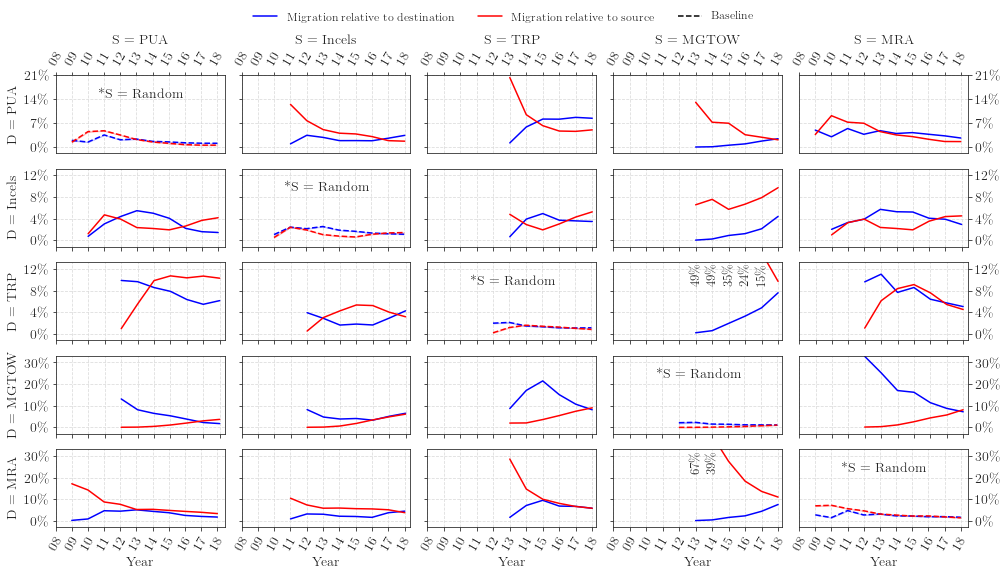

In [37]:
# plots figure

fig = plt.figure(
    constrained_layout=False,
    figsize=(14, 8),
)

ylims = [ 
    (-0.018, 0.198), 
    (-0.012, 0.132), 
    (-0.012, 0.132), 
    (-0.03, 0.33),
    (-0.03, 0.33)
]

yticklabels = [
    ["0\%", "7\%", "14\%", "21\%"],
    ["0\%", "4\%", "8\%", "12\%"],
    ["0\%", "4\%", "8\%", "12\%"],
    ["0\%", "10\%", "20\%", "30\%"],
    ["0\%", "10\%", "20\%", "30\%"]
]


yticks = [ 
    [0, 0.07, 0.14, 0.21], 
    [0, 0.04, 0.08, 0.12], 
    [0, 0.04, 0.08, 0.12], 
    [0, 0.1, 0.2, 0.3],
    [0, 0.1, 0.2, 0.3]
]

correct_names = {"pua":"PUA", "incels":"Incels", "trp":"TRP", 
                 "mgtow":"MGTOW", "mra":"MRA", "random":"random"}


gs = fig.add_gridspec(nrows=5, ncols=5, wspace=0.1, top=0.90)
axs = []
for i in range(25):
    axs.append(fig.add_subplot(gs[i//5, i%5]))
    
for idy, (target, sources) in enumerate(targets_constraints.items()):
    
    if target == "random":
        continue

    for idx, source in enumerate(sources):
        ax = axs[idx + idy*5]
        
        print(source)
        
        df_tmp = df[(df["from"] == source) & (df["target"] == target)]
        df_tmp2 = df_random[(df_random["target"] == target) & (df_random["from"] == "random")]

        if source != "random":
            sns.lineplot(x="idxo", y="pct", data=df_tmp, ax=ax, color="blue")
            sns.lineplot(x="idxo", y="pct_a", data=df_tmp, ax=ax, color="red")
        else:
            l = sns.lineplot(x="idxo", y="pct", data=df_tmp2, ax=ax, color="blue", ls="-")
            l.lines[-1].set_linestyle("--")

            l = sns.lineplot(x="idxo", y="pct_a", data=df_tmp2, ax=ax, color="red", ls="--")
            l.lines[-1].set_linestyle("--")
            ax.text(0.5, 0.75, '*S = Random', horizontalalignment='center',
                        verticalalignment='center', transform=ax.transAxes, size=14)
#         l = sns.lineplot(x="idxo", y="pct_a", data=df_tmp2, ax=ax, color="black")
#         l.lines[-1].set_linestyle("--")
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        if idy == 0:
            ax.set_title("S = "+ correct_names[source] if source != "random" else "S = PUA", fontsize=14)
            ax.xaxis.tick_top()

        if idx == 0:
            ax.set_ylabel("D = " + correct_names[target], fontsize=14)
            ax.set_yticklabels(yticklabels[idy])
        else:
            ax.set_ylabel("")
            ax.set_yticklabels([])
        
        if idy == 4 or idy == 0:
            ax.set_xticklabels([v[-2:] for v in bins_t_o], rotation=60)

        if idy == 4:
            ax.set_xlabel("Year")
        else:
            ax.set_xticklabels([])
            
        if idy == 0:
            ax.set_xticklabels([v[-2:] for v in bins_t_o], rotation=60)
            
        if idx == 4:
            ax.yaxis.tick_right()
            ax.set_yticklabels(yticklabels[idy])

        
        ax.set_ylim(ylims[idy])
        ax.set_xticks(list(range(11)))
        ax.set_yticks(yticks[idy])
        ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
        ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')

import matplotlib.patches as patches
import matplotlib.dates as matdates
from matplotlib.lines import Line2D
list_mak = [mmark.MarkerStyle('.'),mmark.MarkerStyle(','),mmark.MarkerStyle('o')]

custom_lines = [
    Line2D([0], [0], color="blue", lw=1.5),
    Line2D([0], [0], color="red", lw=1.5),
    Line2D([0], [0], color="black", lw=1.5, ls="--"),
]

axs[2].legend(custom_lines, ['Migration relative to destination', 
                             'Migration relative to source', 
                             'Baseline'], 
          loc="center", ncol=3, bbox_to_anchor=(0.45, 1.75), frameon=False, fontsize=12)


tmp_df = df[(df["from"] == "mgtow") & (df["target"] == "trp")]
for _, row in tmp_df.iterrows():
    row=dict(row)
    if row["pct_a"] > 0.12:
        axs[13].text(row["idxo"], 0.12 - 0.012, "{}\%".format(round(row["pct_a"]*100)), 
                     rotation=90, va="center", ha="center", fontsize=13)

        
tmp_df = df[(df["from"] == "mgtow") & (df["target"] == "mra")]
for _, row in tmp_df.iterrows():
    row=dict(row)
    if row["pct_a"] > 0.30:
        axs[23].text(row["idxo"], 0.3 - 0.03, "{}\%".format(round(row["pct_a"]*100)), 
                     rotation=90, va="center", ha="center", fontsize=13)
    
set_size(fig, (14, 8))
fig.savefig("/data/savvas/incels/manosphere_analysis/images/user_migra_reddit.pdf", bbox_inches='tight')